In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.list_physical_devices(device_type=None)


import tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

from keras import callbacks 
from keras.constraints import maxnorm
from keras.models import Sequential
from keras.layers import Dense

from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout,Flatten
import keras

In [2]:
img=np.load('train_image.npy')
img.shape

(2378, 768, 768)

In [3]:
#data preprocessing--------------------------------------------------------------------------------
#DNN 4 slices, each slice size:32*32
#use 32*32 image to predict 20*20 image


#create trainset
DNN_train=np.zeros((2375*4,32,32,3))

#1st slice
DNN_train[:2375,:,:,0]=img[:-3][:,:32,:32]
DNN_train[:2375,:,:,1]=img[1:-2][:,:32,:32]
DNN_train[:2375,:,:,2]=img[2:-1][:,:32,:32]

#2nd slice
DNN_train[2375:2375*2,:,:,0]=img[:-3][:,32:64,32:64]
DNN_train[2375:2375*2,:,:,1]=img[1:-2][:,32:64,32:64]
DNN_train[2375:2375*2,:,:,2]=img[2:-1][:,32:64,32:64]

#3rd slice 
DNN_train[2375*2:2375*3,:,:,0]=img[:-3][:,64:96,64:96]
DNN_train[2375*2:2375*3,:,:,1]=img[1:-2][:,64:96,64:96]
DNN_train[2375*2:2375*3,:,:,2]=img[2:-1][:,64:96,64:96]

#4th slice
DNN_train[2375*3:2375*4,:,:,0]=img[:-3][:,96:128,96:128]
DNN_train[2375*3:2375*4,:,:,1]=img[1:-2][:,96:128,96:128]
DNN_train[2375*3:2375*4,:,:,2]=img[2:-1][:,96:128,96:128]


label=np.zeros((2375*4,20*20))
label[:2375]=img[3:][:,6:26,6:26].reshape(2375,20*20)
label[2375:2375*2]=img[3:][:,38:58,38:58].reshape(2375,20*20)
label[2375*2:2375*3]=img[3:][:,70:90,70:90].reshape(2375,20*20)
label[2375*3:2375*4]=img[3:][:,102:122,102:122].reshape(2375,20*20)

In [4]:
label.shape

(9500, 400)

In [5]:
DNN_train.shape

(9500, 32, 32, 3)

In [6]:
np.save('DNNtrain32.npy',DNN_train)
np.save('DNNtrain_label32.npy',label)

In [7]:
img1=np.load('test_image.npy')
img1.shape

(598, 768, 768)

In [8]:
#Create testset
DNN_test=np.zeros((595*4,32,32,3))

DNN_test[:595,:,:,0]=img1[:-3][:,:32,:32]
DNN_test[:595,:,:,1]=img1[1:-2][:,:32,:32]
DNN_test[:595,:,:,2]=img1[2:-1][:,:32,:32]

DNN_test[595:595*2,:,:,0]=img1[:-3][:,32:64,32:64]
DNN_test[595:595*2,:,:,1]=img1[1:-2][:,32:64,32:64]
DNN_test[595:595*2,:,:,2]=img1[2:-1][:,32:64,32:64]

DNN_test[595*2:595*3,:,:,0]=img1[:-3][:,64:96,64:96]
DNN_test[595*2:595*3,:,:,1]=img1[1:-2][:,64:96,64:96]
DNN_test[595*2:595*3,:,:,2]=img1[2:-1][:,64:96,64:96]

DNN_test[595*3:595*4,:,:,0]=img1[:-3][:,96:128,96:128]
DNN_test[595*3:595*4,:,:,1]=img1[1:-2][:,96:128,96:128]
DNN_test[595*3:595*4,:,:,2]=img1[2:-1][:,96:128,96:128]

label=np.zeros((595*4,20*20))
label[:595]=img1[3:][:,6:26,6:26].reshape(595,20*20)
label[595:595*2]=img1[3:][:,38:58,38:58].reshape(595,20*20)
label[595*2:595*3]=img1[3:][:,70:90,70:90].reshape(595,20*20)
label[595*3:595*4]=img1[3:][:,102:122,102:122].reshape(595,20*20)

In [9]:
label.shape

(2380, 400)

In [10]:
DNN_test.shape

(2380, 32, 32, 3)

In [11]:
np.save('DNNtest32.npy',DNN_test)
np.save('DNNtest_label32.npy',label)

In [2]:
#Import data--------------------------------------------------------------------------------------------
img=np.load('DNNtrain32.npy')
lb=np.load('DNNtrain_label32.npy')
img.shape #shape of trainset image

(9500, 32, 32, 3)

In [3]:
lb.shape #shape of trainset label

(9500, 400)

In [4]:
test_img=np.load('DNNtest32.npy')
test_lb=np.load('DNNtest_label32.npy')
test_img.shape #shape of testset image

(2380, 32, 32, 3)

In [5]:
test_lb.shape #shape of testset label

(2380, 400)

In [6]:
#create DNN model--------------------------------------------------------------------------------------
with tf.device("cpu:0"):
    def create_model():

        model = Sequential()
        model.add(keras.Input(shape=(32,32,3)))
        model.add(Flatten())
        model.add(Dense(1024,activation='relu'))
        model.add(Dense(4000,activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(1024,activation='relu'))
        model.add(Dense(20*20))
        model.summary()
        
        eval_type1 = 'mean_squared_error'
        eval_type2=tf.keras.metrics.RootMeanSquaredError()

        model.compile(loss='mean_squared_error',optimizer='adam',metrics=[eval_type1,eval_type2])
        
        return model

model=create_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dense_1 (Dense)              (None, 4000)              4100000   
_________________________________________________________________
dropout (Dropout)            (None, 4000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              4097024   
_________________________________________________________________
dense_3 (Dense)              (None, 400)               410000    
Total params: 11,753,776
Trainable params: 11,753,776
Non-trainable params: 0
____________________________________________

In [10]:
#define batch size and epochs 
bsize=20
epch=40

In [11]:
#Train the model------------------------------------------------------------------------------------
model.fit(img, lb,batch_size = bsize,validation_split=0.10, epochs=epch)

Epoch 1/40
428/428 [==============================] - 2s 5ms/step - loss: 3.6542 - mean_squared_error: 3.6542 - root_mean_squared_error: 1.9116 - val_loss: 4.4151 - val_mean_squared_error: 4.4151 - val_root_mean_squared_error: 2.1012
Epoch 2/40
428/428 [==============================] - 2s 5ms/step - loss: 3.6899 - mean_squared_error: 3.6899 - root_mean_squared_error: 1.9209 - val_loss: 4.6930 - val_mean_squared_error: 4.6930 - val_root_mean_squared_error: 2.1663
Epoch 3/40
428/428 [==============================] - 2s 5ms/step - loss: 3.6762 - mean_squared_error: 3.6762 - root_mean_squared_error: 1.9173 - val_loss: 4.6812 - val_mean_squared_error: 4.6812 - val_root_mean_squared_error: 2.1636
Epoch 4/40
428/428 [==============================] - 2s 5ms/step - loss: 3.6651 - mean_squared_error: 3.6651 - root_mean_squared_error: 1.9145 - val_loss: 4.4808 - val_mean_squared_error: 4.4808 - val_root_mean_squared_error: 2.1168
Epoch 5/40
428/428 [==============================] - 2s 5ms/ste

Epoch 36/40
428/428 [==============================] - 2s 5ms/step - loss: 3.6053 - mean_squared_error: 3.6053 - root_mean_squared_error: 1.8988 - val_loss: 4.4535 - val_mean_squared_error: 4.4535 - val_root_mean_squared_error: 2.1103
Epoch 37/40
428/428 [==============================] - 2s 5ms/step - loss: 3.5863 - mean_squared_error: 3.5863 - root_mean_squared_error: 1.8938 - val_loss: 4.4318 - val_mean_squared_error: 4.4318 - val_root_mean_squared_error: 2.1052
Epoch 38/40
428/428 [==============================] - 2s 5ms/step - loss: 3.5882 - mean_squared_error: 3.5882 - root_mean_squared_error: 1.8943 - val_loss: 4.4842 - val_mean_squared_error: 4.4842 - val_root_mean_squared_error: 2.1176
Epoch 39/40
428/428 [==============================] - 2s 5ms/step - loss: 3.5956 - mean_squared_error: 3.5956 - root_mean_squared_error: 1.8962 - val_loss: 4.3926 - val_mean_squared_error: 4.3926 - val_root_mean_squared_error: 2.0959
Epoch 40/40
428/428 [==============================] - 2s 5m

In [12]:
#Evaluate the model---------------------------------------------------------------------------------
model.evaluate(test_img, test_lb)

75/75 [==============================] - 0s 2ms/step - loss: 3.8767 - mean_squared_error: 3.8767 - root_mean_squared_error: 1.9689


[3.876734495162964, 3.876734495162964, 1.9689425230026245]

In [13]:
predictions=model.predict(test_img)

In [14]:
predictions.shape

(2380, 400)

In [15]:
predictions.shape

(2380, 400)

In [56]:
#Plot a sample prediction generated by using testset
a=np.round(predictions[8]).reshape(20,20)

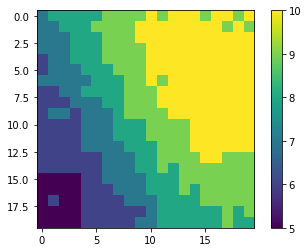

In [62]:
plt.imshow(a)
plt.colorbar()
plt.show()

In [58]:
#Plot the corresponding label  of the testset
b=test_lb[8].reshape(20,20)

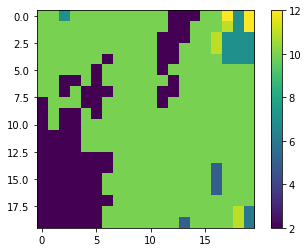

In [59]:
plt.imshow(b)
plt.colorbar()
plt.show()